# STEP #0: PROBLEM STATEMENT  


- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning). 
- Auto encoders use the same input data for the input and output, Sounds crazy right!?
- Auto encoders work by adding a bottleneck in the network.
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent) 






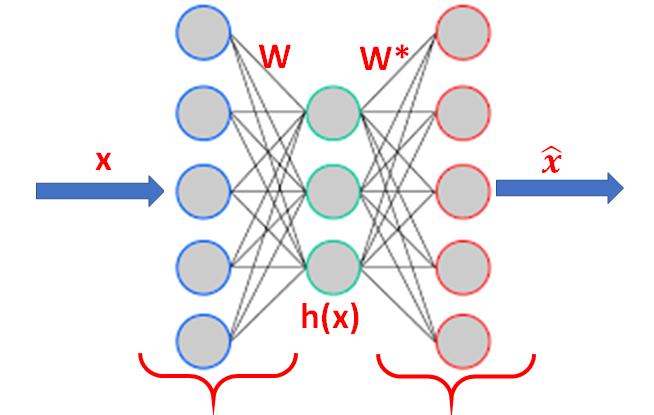

# STEP #1: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

# STEP #2: LOAD DATASET

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

# STEP #3: DATA VISUALIZATION

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

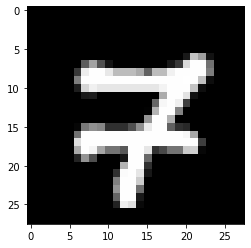

In [6]:
i = random.randint(1,60000)
plt.imshow( X_train[i] , cmap = 'gray') # reshape and plot the image

In [7]:
label = y_train[i]
label

7

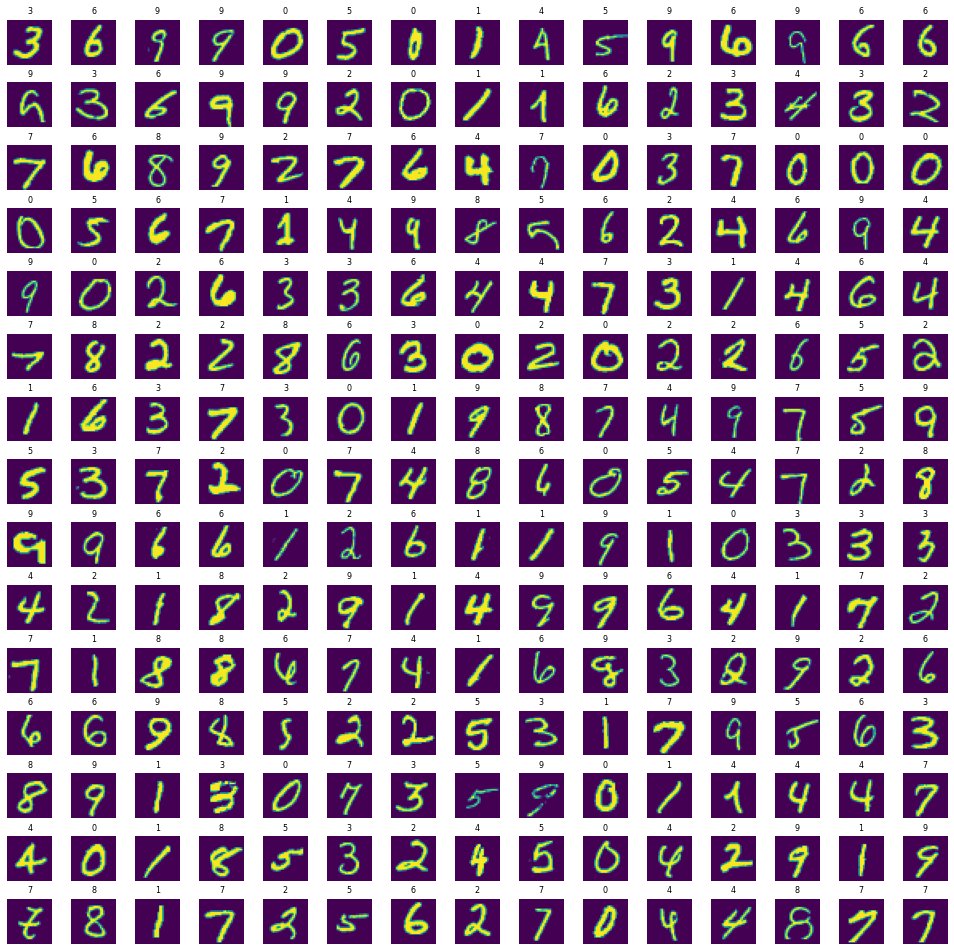

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train)

for j in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[j].imshow(X_train[index])
    axes[j].set_title(y_train[index], fontsize=8)
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.4)


# STEP #4: LET'S ADD SOME NOISE TO OUR DATASET!

In [9]:
# normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# create some noise with the same dimensions as the original image (28,28)
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

In [11]:
# take a sample image and add noise to it
noise_factor = 0.2
sample_image = X_train[i]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

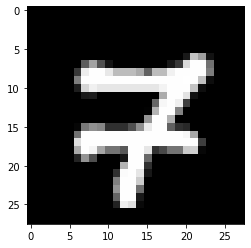

In [12]:
plt.imshow(sample_image, cmap='gray')

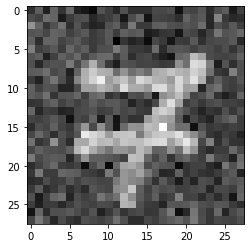

In [13]:
plt.imshow(noisy_sample_image, cmap='gray')

In [14]:
noisy_sample_image.max()

1.5603480853804443

In [15]:
noisy_sample_image.min()

-0.5650557074377559

In [16]:
# clip : A function that converts values less than the min value to the min value and values greater than the max value to the max value.
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)

In [17]:
noisy_sample_image.max()

1.0

In [18]:
noisy_sample_image.min()

0.0

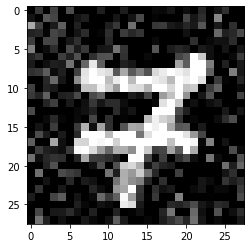

In [19]:
plt.imshow(noisy_sample_image, cmap='gray')

In [20]:
# do the same operation over all the images contained in the training dataset
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

In [21]:
X_train_noisy

Output hidden; open in https://colab.research.google.com to view.

In [22]:
# Convert from list to array
X_train_noisy = np.array(X_train_noisy)

In [23]:
X_train_noisy.shape

(60000, 28, 28)

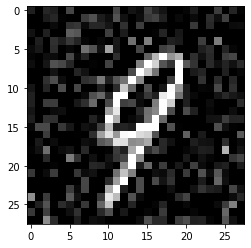

In [24]:
plt.imshow(X_train_noisy[22], cmap='gray')

In [25]:
#do the same operation for the testing dataset as well
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

In [26]:
X_test_noisy.shape

(10000, 28, 28)

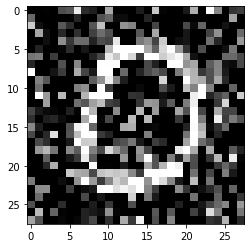

In [27]:
# Let's make sure that the test images are noisy as well!
plt.imshow(X_test_noisy[10], cmap = 'gray')

# STEP #5: BUILD AND TRAIN OUR AUTOENCODER DEEP LEARNING MODEL

In [28]:
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))

# Encoded image (code layer)
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding='same'))


In [29]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0

In [30]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=10, 
          batch_size=200)


Epoch 1/10
300/300 [==============================] - 5s 5ms/step - loss: 0.2054
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1058
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0974
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0941
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0920
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0905
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0894
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0884
Epoch 9/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0876
Epoch 10/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0869


# STEP #5: EVALUATE THE MODEL

In [31]:
# Let's pick up 15 images and run them through the trained autoencoder
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 219ms/step


In [32]:
denoised_images.shape

(15, 28, 28, 1)

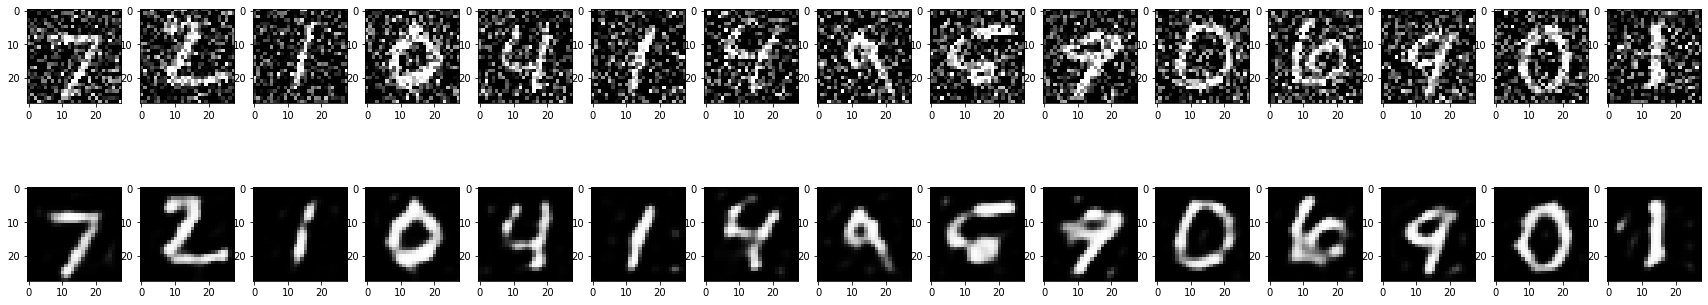

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
    

# LET'S CONFIRM THE DIMENSIONS

Notes: 


*   If stride = 1 and we use "same" padding, the output feature map dimension will be equal to the output dimensions. Example: 
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
* If stride = 2 and we use "same" padding, the output feature map dimesions will be smaller (cut in half)
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))

* Padding = 'same' means that we would like to preserve the dimensions of the input so during the convolution process, zero padding will be added around the image
* padding = 'valid' means that we are ready to lose information so the only valid pixels are the ones present at the edges of the input image, ie: do not add any padding around the image



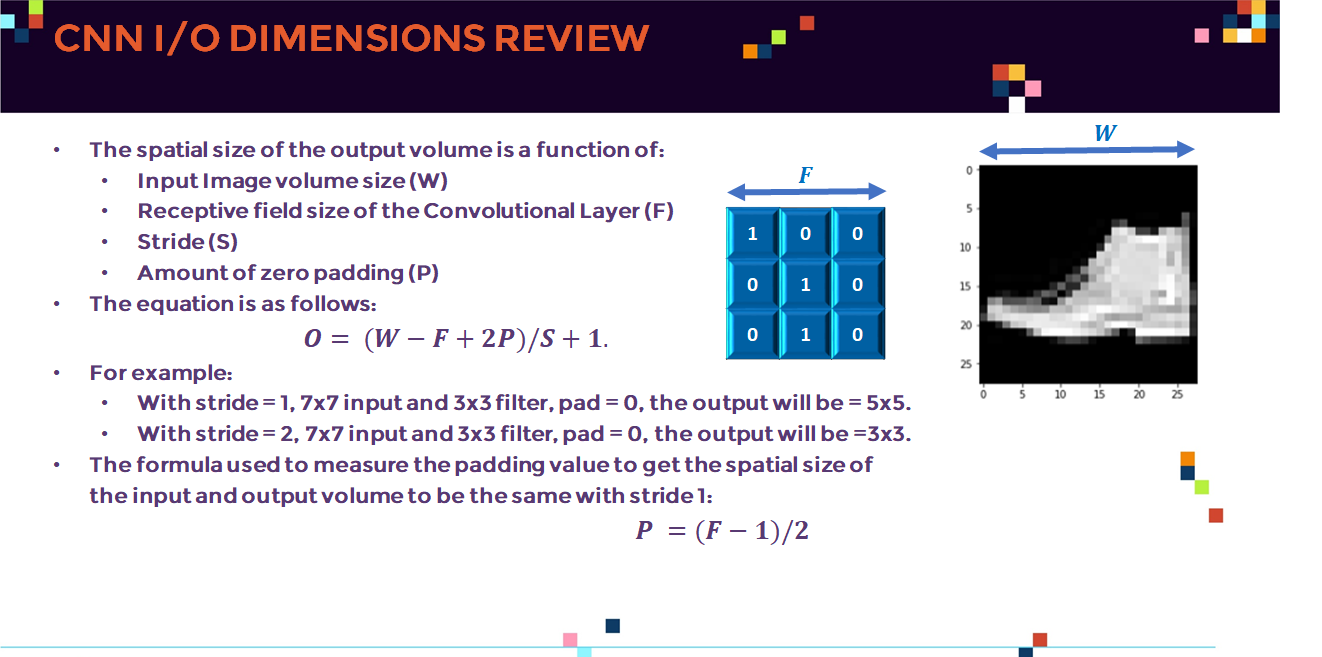

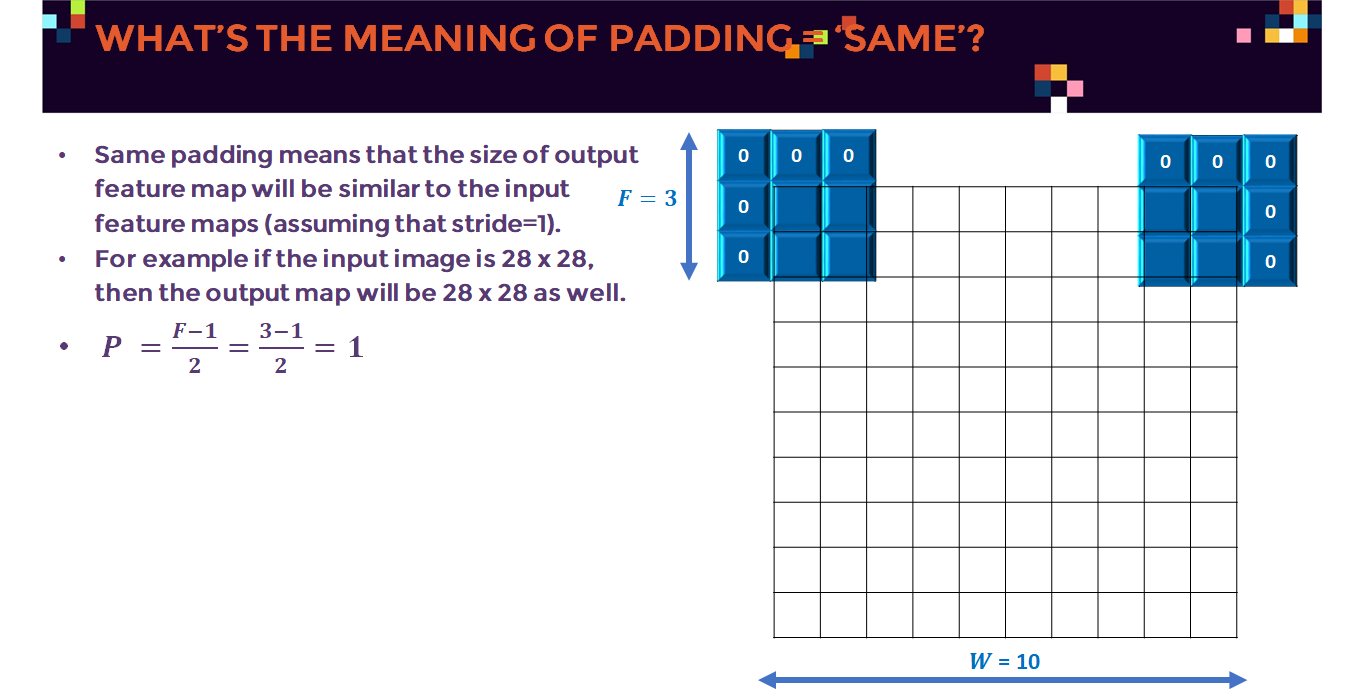

In [34]:
# W = 28, F = 3, S = 1, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/1 + 1 = 28
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [35]:
# W = 28, F = 3, S = 2, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/2 + 1 = 14
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [36]:
# When padding = valid, we did not add any border (zero padding) around the input 
# W = 28, F = 3, S = 1, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/1 + 1 = 26

autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="valid", input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [37]:
# When padding = valid, we did not add any border (zero padding) around the input 
# W = 28, F = 3, S = 2, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/2 + 1 = 13

autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="valid", input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
